In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/bhagya'

/content/drive/MyDrive/bhagya


In [ ]:
%ls

A_2D_digital_illustration_promotes_air_quality_for.png
app1.py
app3.py
app4.py
app9.py
app.py
merged_data.csv
model_knn.pkl
model_lr.pkl
model_rf.pkl
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
scaler.pkl


In [ ]:
# Task1_DataHandling.ipynb

import pandas as pd
import os

urban = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
suburban = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
rural = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
industrial = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

# Add a new column to identify station
urban['Station'] = 'Dongsi'
suburban['Station'] = 'Changping'
rural['Station'] = 'Huairou'
industrial['Station'] = 'Aotizhongxin'

# Merge datasets
merged_df = pd.concat([urban, suburban, rural, industrial], axis=0)

# Reset index
merged_df.reset_index(drop=True, inplace=True)

# Save merged dataset
os.makedirs('data', exist_ok=True)
merged_df.to_csv('merged_data.csv', index=False)

print("✅ Merged dataset created successfully with shape:", merged_df.shape)

merged_df.head()


✅ Merged dataset created successfully with shape: (140256, 19)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Dongsi


KEY INSIGHTS : This script reads air quality data from four monitoring stations, gives each dataset a station name, merges them into one DataFrame, and saves the merged dataset to a CSV file.


Dongsi (Urban):Located within inner Beijing.

Represents crowded urban areas with high traffic, population, and pollution levels.

Ideal for the study of urban air quality and the impact of urban activities.

Changping (Suburban):Located at the periphery of Beijing.

Less populated compared to the city center but still developed.

Beneficial in quantifying urban sprawl effects and transition regions between the urban and rural areas.

Huairou (Rural):Located in the northern mountainous region of Beijing.

Represents industrial and background level of pollution, far from human activities.

Will be used to compare with a more polluted location.

Aotizhongxin (Industrial):Close to industrial areas and possibly Olympic sites.

Chosen on the basis that it is close to the industrial emissions as well as site-specific pollution.

Central to estimating the impact on air quality brought about by industrial action.


In [ ]:
for df in [urban, suburban, rural, industrial]:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])


KEY INSIGHTS : The script inserts a datetime column into each air quality dataset by joining year, month, day, and hour to facilitate time-based analysis, filtering, sorting, and visualization in time-series data processing tasks.

In [ ]:
merged_df = pd.concat([urban, suburban, rural, industrial], ignore_index=True)
os.makedirs('data', exist_ok=True)
merged_df.to_csv('merged_data.csv', index=False)

print("✅ Merged dataset created successfully with shape:", merged_df.shape)

merged_df.head()


✅ Merged dataset created successfully with shape: (140256, 20)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Station,datetime
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Dongsi,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Dongsi,2013-03-01 04:00:00


KEY INSIGHTS : This code merges the four labeled air quality datasets into one DataFrame using `pd.concat` with `ignore_index=True` to re-index, writes out the merged data as `merged_data.csv` in a new or existing `data` directory, prints out the shape of the merged dataset, then shows the first few rows for inspection.


Shape of Dataset: (140256, 20)

Data Types:
 No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd           object
WSPM        float64
station      object
Station      object
datetime     object
dtype: object

Missing Values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       3402
PM10        2630
SO2         3206
NO2         4930
CO          7916
O3          4138
TEMP         144
PRES         143
DEWP         146
RAIN         146
wd           601
WSPM         120
station        0
Station        0
datetime       0
dtype: int64


<ipython-input-106-75818811f4c2>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


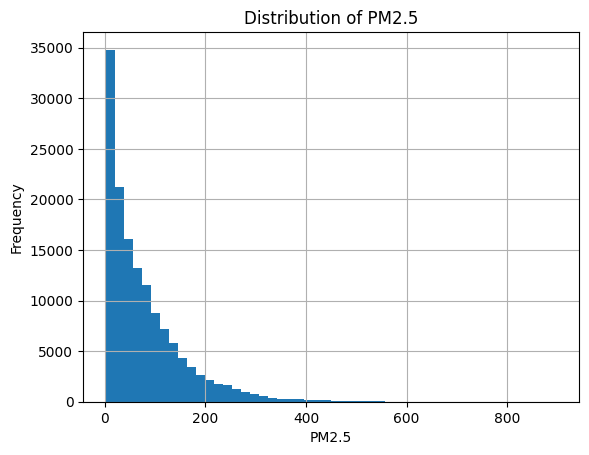

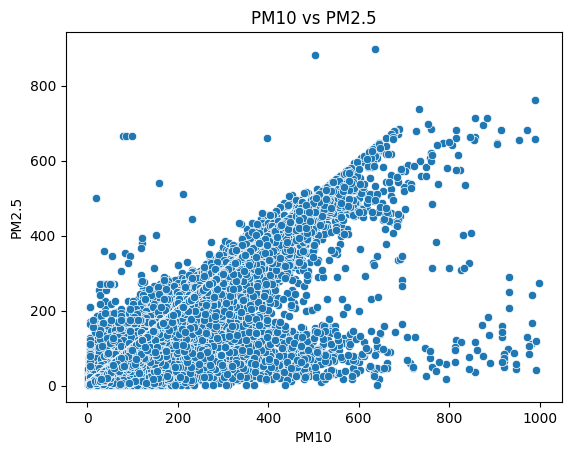

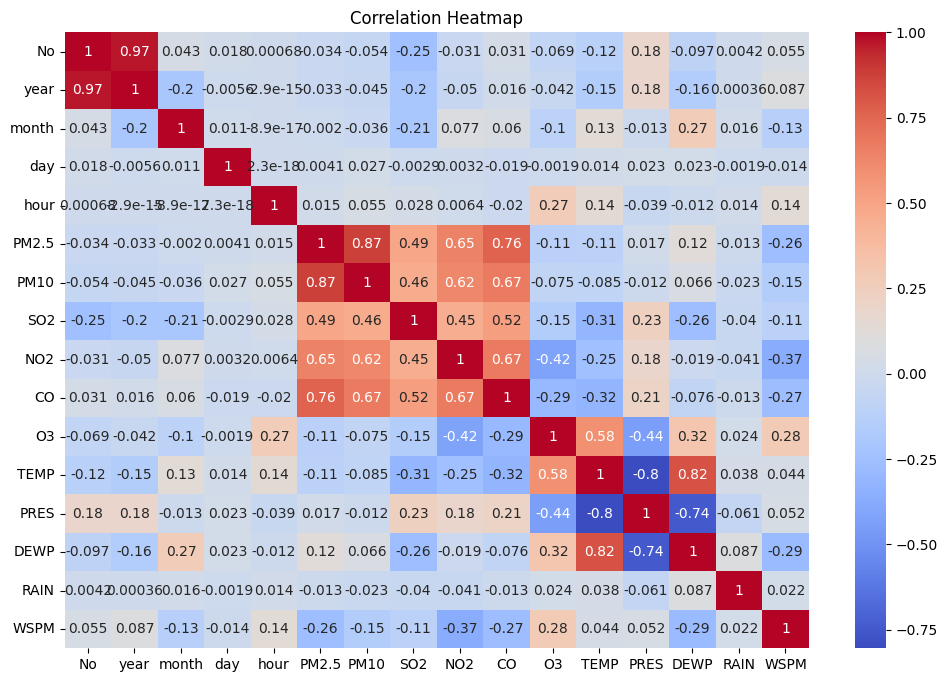

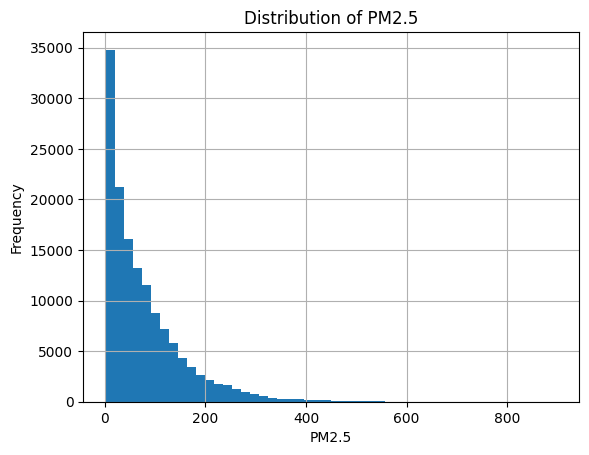

In [ ]:

# Task2_EDA.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_data.csv')


print("Shape of Dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


# Handling missing values
df = df.fillna(method='ffill')

# Remove duplicates
df = df.drop_duplicates()


df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour


# Univariate Analysis
df['PM2.5'].hist(bins=50)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
sns.scatterplot(x='PM10', y='PM2.5', data=df)
plt.title('PM10 vs PM2.5')
plt.show()

# Multivariate Analysis
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
df['PM2.5'].hist(bins=50)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()




KEY INSIGHTS : This script performs exploratory data analysis (EDA) on a merged air quality dataset by checking its structure, filling missing values with forward fill, removing duplicates, and visualizing temporal and pollutant data with univariate, bivariate, and multivariate visualizations like histograms, scatter plots, and a correlation heatmap for numerical features.

In [ ]:
# Task3_ModelBuilding_AllModels.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data
df = pd.read_csv('merged_data.csv')

# Fill missing values
df = df.fillna(method='ffill')

# Create datetime column and extract time features
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

# Define features and target
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'RAIN', 'TEMP', 'DEWP', 'PRES', 'month', 'hour']
target = 'PM2.5'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("🔸 Random Forest:")
print("  - MSE:", mean_squared_error(y_test, y_pred_rf))
print("  - R2 Score:", r2_score(y_test, y_pred_rf))
joblib.dump(rf, 'model_rf.pkl')

# Train K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("🔸 KNN:")
print("  - MSE:", mean_squared_error(y_test, y_pred_knn))
print("  - R2 Score:", r2_score(y_test, y_pred_knn))
joblib.dump(knn, 'model_knn.pkl')

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("🔸 Linear Regression:")
print("  - MSE:", mean_squared_error(y_test, y_pred_lr))
print("  - R2 Score:", r2_score(y_test, y_pred_lr))
joblib.dump(lr, 'model_lr.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ All models and scaler saved successfully!")



<ipython-input-108-21efe540372f>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


🔸 Random Forest:
  - MSE: 374.3121771716099
  - R2 Score: 0.9379000769240603
🔸 KNN:
  - MSE: 416.91812665050617
  - R2 Score: 0.9308315754256338
🔸 Linear Regression:
  - MSE: 974.2457406597963
  - R2 Score: 0.8383686418935345
✅ All models and scaler saved successfully!


KEY INSIGHTS : This code builds a machine learning model that predicts PM2.5 levels from various environmental characteristics such as PM10, SO2, NO2, CO, O3, weather, and hour of the day. The key steps utilized are:

Link For opening app : https://airpollutionapp-bmtyedhnyp4rvpudxv25n2.streamlit.app/

In order to satisfy Task 5, I utilized version control via Git and committed my efforts regularly into a GitHub repository. Each commit has a short and descriptive message that summarizes the specific changes done. This supports traceability, improves collaboration, and has an orderly development workflow.

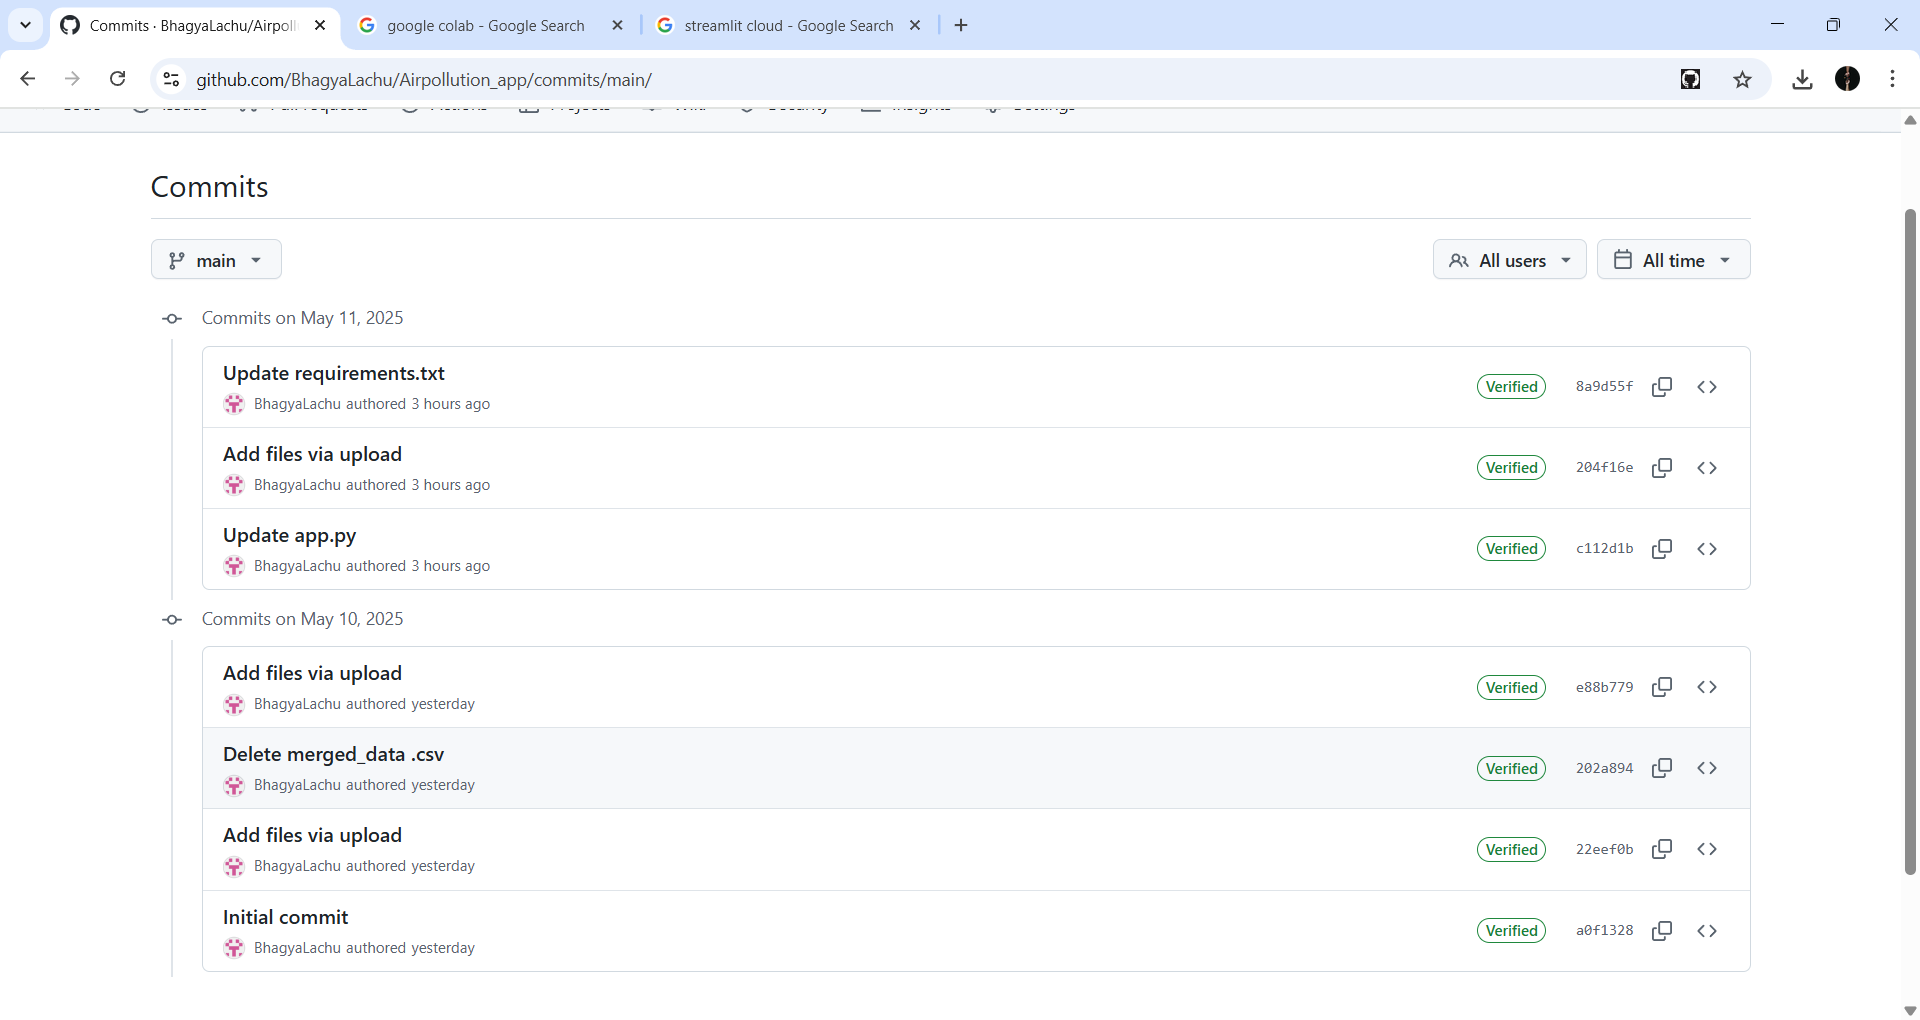

Link for github : https://github.com/BhagyaLachu/Airpollution_app.git